In [20]:
Covariation and Correlation: retweet
sentiment
Sampling
basic machine learning

SyntaxError: invalid syntax (3018476008.py, line 1)

In [3]:
import pandas as pd
import numpy as np

Reading JSON

In [4]:
# Note: the following my take over a minute
try:
    df = pd.read_json('data/twitter_data_chatgpt_v2.json.bz2', lines = True)
    df.set_index('id', inplace=True)
except:
    print('You did not run the previous notebook! Reading the csv')
    df = pd.read_csv('data/twitter_data_chatgpt.csv.bz2')
    from helpers.analysis_preprocessor import preprocess # imports the preprocess from helpers/analysis_preprocessor.py 
    df = preprocess(df)

df.sort_index(inplace=True)
df

,created_at,text,username,like_count,retweet_count,engagement_count,hashtags
id,,,,,,,
1610535734758219778,2023-01-04 07:16:56+00:00,I used chat gpt to get gym workout program and...,pnik91,0,0,0,[]
1610535786017091584,2023-01-04 07:17:08+00:00,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1,0,1,[]
1610535837363486720,2023-01-04 07:17:20+00:00,all my twitter feed is about ChatGPT and @Open...,mcp350,3,1,4,[#ChatGPT]
1610535961670172674,2023-01-04 07:17:50+00:00,#ChatGPT So much #Censorship. Never trust a...,TryingToOffend,2,0,2,"[#ChatGPT, #Censorship.\n\nNever]"
1610536038094757888,2023-01-04 07:18:08+00:00,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,1,0,1,"[#LAMDA, #ChatGPT]"
...,...,...,...,...,...,...,...
1641213003260633088,2023-03-29 22:57:26+00:00,Most people haven't heard of Chat GPT yet. Fir...,nikocosmonaut,0,0,0,[]
1641213110915571715,2023-03-29 22:57:52+00:00,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0,0,0,"[#OutOfContextAI, #AILifeLessons, #ChatGPT]"
1641213115684536323,2023-03-29 22:57:53+00:00,https://t.co/FjJSprt0te - Chat with any PDF! C...,yjleon1976,0,0,0,"[#chatpdf, #ChatGPT]"


# Handling dates
Pandas uses the datetime64 data type to store date-time information efficiently. It provides rich functionality through .dt accessor and DatetimeIndex.

If a column that represent date is in a correct and Pandas-recognizable format, converting that column to a datetime is straightforward:

In [36]:
df['created_at'] = pd.to_datetime(df['created_at'])


Some data sources include timezone information in their date-time fields. For instance, Twitter/X (as well as Reddit and YouTube) store datetime data in UTC (which is a fancy name for GMT). 

This means that if a user tweets from Japan at 11:00 AM Japan Standard Time, the timestamp will appear as 3:00 AM UTC—which can be confusing. If you're working with data from a specific country or region, it's a good idea to convert the timestamps to the local timezone using `tz_convert`.

In [37]:
df["created_at"].dt.tz_convert("Asia/Tokyo")

id
1610535734758219778   2023-01-04 16:16:56+09:00
1610535786017091584   2023-01-04 16:17:08+09:00
1610535837363486720   2023-01-04 16:17:20+09:00
1610535961670172674   2023-01-04 16:17:50+09:00
1610536038094757888   2023-01-04 16:18:08+09:00
                                 ...           
1641213003260633088   2023-03-30 07:57:26+09:00
1641213110915571715   2023-03-30 07:57:52+09:00
1641213115684536323   2023-03-30 07:57:53+09:00
1641213218520481805   2023-03-30 07:58:18+09:00
1641213230730051584   2023-03-30 07:58:21+09:00
Name: created_at, Length: 499961, dtype: datetime64[ns, Asia/Tokyo]

Use .dt accessor to access each date component: `dt.date, dt.year, dt.month, dt.day, dt.hour, dt.day_name()`

Let's create new columns to represent the month and the day of the week, and hour of the day each tweet was created

In [38]:
df['month'] = df['created_at'].dt.month
df['day_of_week'] = df['created_at'].dt.day_name()
df['hour'] = df['created_at'].dt.hour

You can filter on datetime columns:

In [39]:
# Filter tweets from January 2023
jan_2023_tweets = df[df['created_at'].dt.month == 1]
print(f"Number of tweets from January: {len(jan_2023_tweets)}")

# Filter tweets from weekends
weekend_tweets = df[df['day_of_week'].isin(['Saturday', 'Sunday'])]
print(f"Number of tweets from weekends: {len(weekend_tweets)}")

# Filter tweets from business hours (9 AM to 5 PM)
business_hours_tweets = df[(df['hour'] >= 9) & (df['hour'] <= 17)]
print(f"Number of tweets during business hours: {len(business_hours_tweets)}")

# Filter tweets after 1st of March 2023
after_first_of_march = df[df['created_at'] > '2023-03-01']
print(f"Number of tweets after the first of March: {len(after_first_of_march)}")


Number of tweets from January: 135985
Number of tweets from weekends: 108567
Number of tweets during business hours: 220768
Number of tweets after the first of March: 190870


You can groupby a specific date component, e.g., group by the name of the date and show the size of each group, which shows the number of tweets posted in each day.

In [40]:
print(df.groupby(df.created_at.dt.day_name()).size())


created_at
Friday       74445
Monday       69303
Saturday     56008
Sunday       52559
Thursday     77971
Tuesday      82783
Wednesday    86892
dtype: int64


You can compute the time difference between the datetime and a predetermined date

In [41]:
df.created_at

id
1610535734758219778   2023-01-04 07:16:56+00:00
1610535786017091584   2023-01-04 07:17:08+00:00
1610535837363486720   2023-01-04 07:17:20+00:00
1610535961670172674   2023-01-04 07:17:50+00:00
1610536038094757888   2023-01-04 07:18:08+00:00
                                 ...           
1641213003260633088   2023-03-29 22:57:26+00:00
1641213110915571715   2023-03-29 22:57:52+00:00
1641213115684536323   2023-03-29 22:57:53+00:00
1641213218520481805   2023-03-29 22:58:18+00:00
1641213230730051584   2023-03-29 22:58:21+00:00
Name: created_at, Length: 499961, dtype: datetime64[ns, UTC]

In [42]:
# Example: Calculate time difference between tweets and a reference date
reference_date = pd.Timestamp('2023-01-01 00:00:00+00:00')
print('Time passed since 2023 new years:')
df['created_at'] - reference_date

Time passed since 2023 new years:


id
1610535734758219778    3 days 07:16:56
1610535786017091584    3 days 07:17:08
1610535837363486720    3 days 07:17:20
1610535961670172674    3 days 07:17:50
1610536038094757888    3 days 07:18:08
                            ...       
1641213003260633088   87 days 22:57:26
1641213110915571715   87 days 22:57:52
1641213115684536323   87 days 22:57:53
1641213218520481805   87 days 22:58:18
1641213230730051584   87 days 22:58:21
Name: created_at, Length: 499961, dtype: timedelta64[ns]

Alternatively, you can subtract between consecutive rows using `diff()`

In [46]:
df['created_at'].diff()

id
1610535734758219778               NaT
1610535786017091584   0 days 00:00:12
1610535837363486720   0 days 00:00:12
1610535961670172674   0 days 00:00:30
1610536038094757888   0 days 00:00:18
                            ...      
1641213003260633088   0 days 00:00:06
1641213110915571715   0 days 00:00:26
1641213115684536323   0 days 00:00:01
1641213218520481805   0 days 00:00:25
1641213230730051584   0 days 00:00:03
Name: created_at, Length: 499961, dtype: timedelta64[ns]

## Resampling
Resampling is changing the frequency of your time series data. It is especially useful when your data is irregular, which is the case with our Twitter dataset. Tweets are stored as they are posted, and there is no guarantee that we will have at least one tweet for every day, hour, or a second (probably for Twitter we would have, but think about TruthSocial).

You resample when you are aggregate the data over time, e.g., the count of tweets per day, hour, per 3 hours etc. Thus, first, you reshape the data so that the index will be the datetime and the values will show some aggregated statistics such as count.

# 4. Get basic statistics for different time periods
daily_stats = df_time.resample('D').agg({
    'retweet_count': 'mean',
    'like_count': 'mean',
    'reply_count': 'mean'
})

# 5. Plot the time series
plt.figure(figsize=(12, 6))
daily_tweets.plot(title='Daily Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Set the datetime column as index and return a new dataframe
df_time = df.set_index('created_at')

# Resample data to different time frequencies
# 'D' (daily), 'W' (weekly), 'M' (monthly), 'H' (hourly)
daily_tweets = df_time.resample('D').size()
weekly_tweets = df_time.resample('W').size()
monthly_tweets = df_time.resample('M').size()

# Print the resampled data
print("Daily tweet counts:")
print(daily_tweets.head())
print("\nWeekly tweet counts:")
print(weekly_tweets.head())
print("\nMonthly tweet counts:")
print(monthly_tweets.head())


Daily tweet counts:
created_at
2023-01-04 00:00:00+00:00    2899
2023-01-05 00:00:00+00:00    4343
2023-01-06 00:00:00+00:00    4272
2023-01-07 00:00:00+00:00    3749
2023-01-08 00:00:00+00:00    3707
Freq: D, dtype: int64

Weekly tweet counts:
created_at
2023-01-08 00:00:00+00:00    18970
2023-01-15 00:00:00+00:00    33881
2023-01-22 00:00:00+00:00    34007
2023-01-29 00:00:00+00:00    37743
2023-02-05 00:00:00+00:00    42317
Freq: W-SUN, dtype: int64

Monthly tweet counts:
created_at
2023-01-31 00:00:00+00:00    135985
2023-02-28 00:00:00+00:00    173106
2023-03-31 00:00:00+00:00    190870
Freq: M, dtype: int64


Or, more custom frequencies and different aggregations over different columns

In [ ]:
# 2-hour intervals
two_hour_tweets = df_time.resample('2H')['retweet_count'].mean()

# 3-day intervals
three_day_tweets = df_time.resample('3D')['like_count'].sum()

# Business days only (Monday-Friday)
business_day_tweets = df_time.resample('B').size()

# Print the resampled data
print("Mean retweet count in each 2-hour interval:")
print(two_hour_tweets.head())
print("\nTotal like count in 3-day intervals:")
print(three_day_tweets.head())
print("\nBusiness day tweet counts:")
print(business_day_tweets.head())


Mean retweet count in each 2-hour interval:
created_at
2023-01-04 06:00:00+00:00    0.175824
2023-01-04 08:00:00+00:00    9.420635
2023-01-04 10:00:00+00:00    3.662698
2023-01-04 12:00:00+00:00    7.658333
2023-01-04 14:00:00+00:00    5.693587
Freq: 2H, Name: retweet_count, dtype: float64

Total like count in 3-day intervals:
created_at
2023-01-04 00:00:00+00:00     99176
2023-01-07 00:00:00+00:00    155265
2023-01-10 00:00:00+00:00    171954
2023-01-13 00:00:00+00:00    135167
2023-01-16 00:00:00+00:00    133225
Freq: 3D, Name: like_count, dtype: int64

Business day tweet counts:
created_at
2023-01-04 00:00:00+00:00     2899
2023-01-05 00:00:00+00:00     4343
2023-01-06 00:00:00+00:00    11728
2023-01-09 00:00:00+00:00     4320
2023-01-10 00:00:00+00:00     5686
Freq: B, dtype: int64


## Rolling Window Analysis
A rolling window allows us to calculate statistics over a sliding window of time. This is useful for smoothing out noise and identifying trends

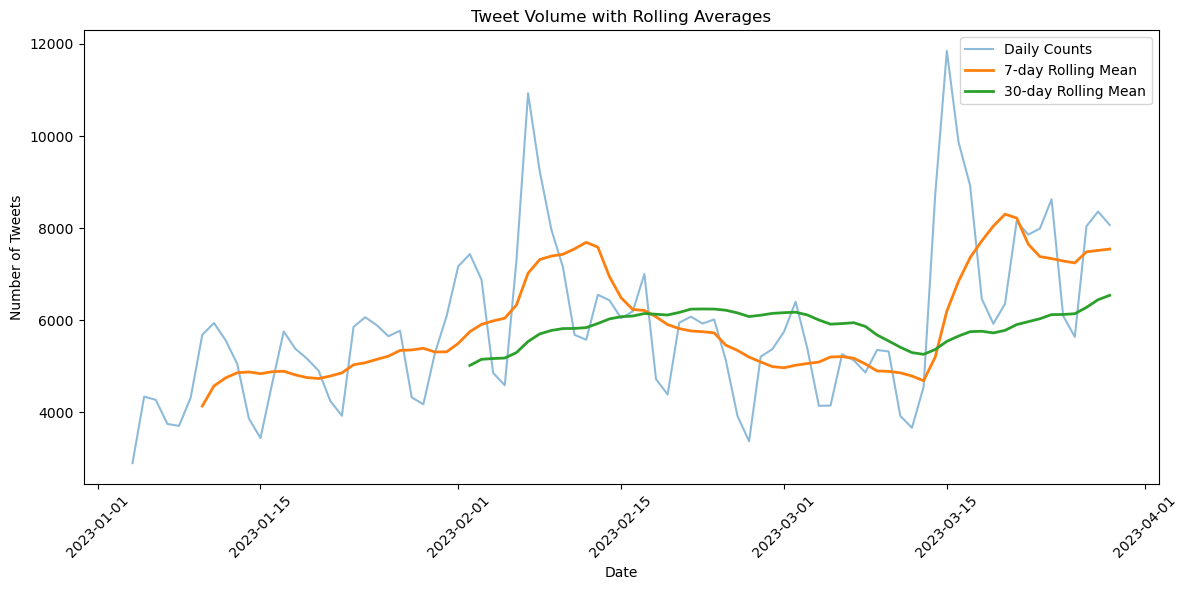

In [51]:
# Calculate 7-day rolling mean of tweet counts
daily_tweets = df_time.resample('D').size()
rolling_7d = daily_tweets.rolling(window=7, center=False).mean()

# Calculate 30-day rolling mean
rolling_30d = daily_tweets.rolling(window=30, center=False).mean()

# Plot the original daily counts and rolling means
plt.figure(figsize=(12, 6))
plt.plot(daily_tweets.index, daily_tweets, label='Daily Counts', alpha=0.5)
plt.plot(rolling_7d.index, rolling_7d, label='7-day Rolling Mean', linewidth=2)
plt.plot(rolling_30d.index, rolling_30d, label='30-day Rolling Mean', linewidth=2)
plt.title('Tweet Volume with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# You can also calculate other statistics in the rolling window
# For example, standard deviation to measure volatility
rolling_std = daily_tweets.rolling(window=7).std()

# Or minimum/maximum values
rolling_min = daily_tweets.rolling(window=7).min()
rolling_max = daily_tweets.rolling(window=7).max()


# Basic Visualizations
Visualization is a crucial tool in data analysis to understand the data, identify patterns, relationships and communicate findings. Common visualization techniques and the questions they answer:

- **Line Plot**: How does a variable change over time?	
- **Histogram**: How values are distributed?
- **Bar Plot**: How do groups compare?
- **Box Plot**: How values are distributed AND groups compare (the Swiss army knife of plots)
- **Scatter**: How are two metrics related?
- **Pie Chart:** Don't use this crap

I will not cover this topic extensively here because:  1) this notebook is already too long 2) the topic itself is too long 3) pandas & matplotlib is not the only way to create plots. I actually used to use 3rd party software to create plots and now use AI.

Refer to the guide by if you wish to go deepr https://royal-statistical-society.github.io/datavisguide/

Pandas, in fact, comes with built-in plotting functions that internally use Matplotlib, making it incredibly convenient to visualize data. Creating a plot can be as simple as calling df.plot() on a DataFrame.

Depending on the type of plot, you may need to provide additional parameters. 

<Axes: xlabel='id'>

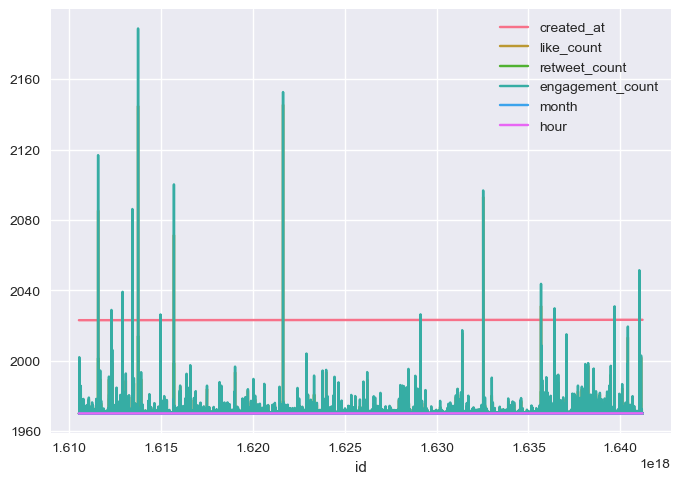

In [61]:
df.plot()

#### Line Plot
Default plot when you call df.plot(). It will set the x-axis the index of the dataframe by default. The lines will show the columns.

Our dataframe's index is id, which does not make sense for the line plot or any kind of plot as you see above, so we set the x-axis to be created_at. 

<Axes: xlabel='created_at'>

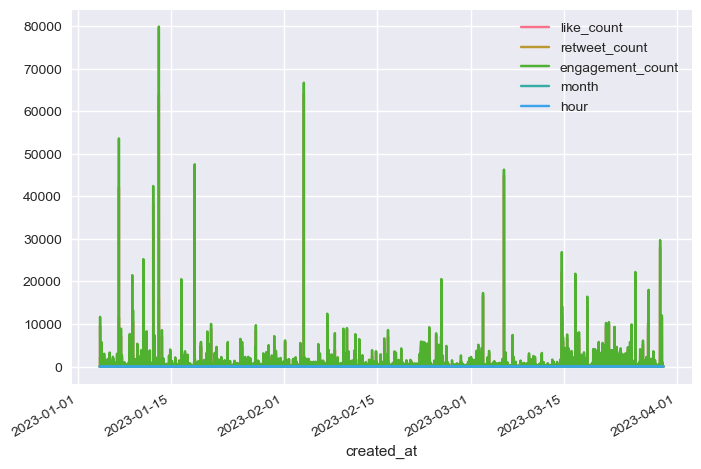

In [62]:
df.plot(x='created_at')

The line plot shows a line for each tweet. This is because we have not aggregated the data.

We set the index to be `created_at`, resample by day, show the total number of tweets

<Axes: title={'center': 'Tweet Count Over Time'}, xlabel='created_at'>

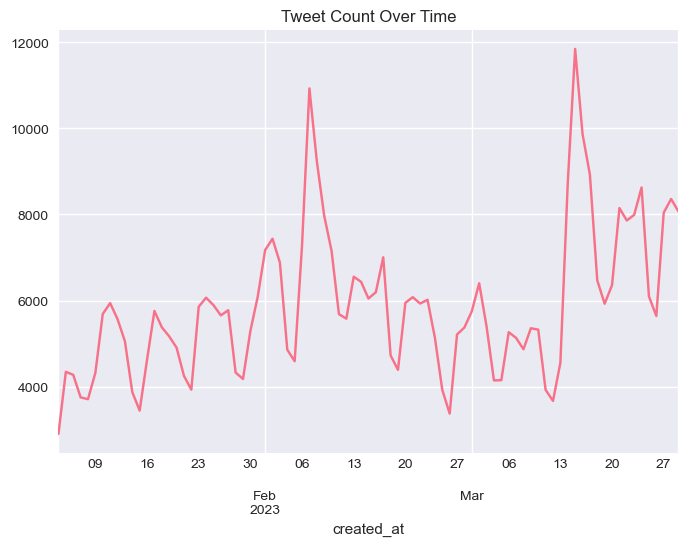

In [65]:
df.set_index('created_at').resample('D').size().plot(title='Tweet Count Over Time')

#### Histogram
Choose column to see its distribution of values. For instance, let's do retweet count:

<Axes: title={'center': 'Distribution of Retweet Counts'}, ylabel='Frequency'>

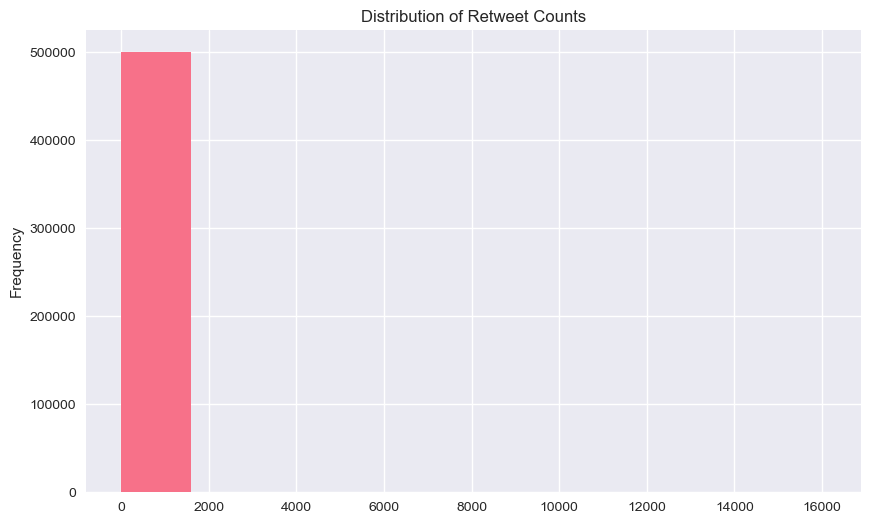

In [68]:
df['retweet_count'].plot(kind='hist', figsize=(10, 6), title='Distribution of Retweet Counts')

Looks awful is not it? The data clearly does not follow a normal distribution. Most tweets receive no retweets, leading to a large spike at zero. Meanwhile, a small number of tweets receive very high retweet counts—these are outliers. This results in a highly skewed distribution with a long tail to the right.

There are several common ways to deal with this kind of skewed data:

- Remove or cap outliers to focus on the bulk of the data.
- Manually define retweet count categories, such as 0, 1–10, 11–1000, and 1000+, to summarize the data more meaningfully.
- Redefine histogram bins to better capture the shape of the distribution.
- Apply a logarithmic scale to the x-axis to compress the range and make the distribution more interpretable.

I usually prefer the last one:

In [2]:
df[df.retweet_count > 0]['retweet_count'].apply(np.log1p).plot(kind='hist')

NameError: name 'df' is not defined

#### Bar Plot




<Axes: title={'center': 'Number of Tweets by Day of Week'}, xlabel='day_of_week'>

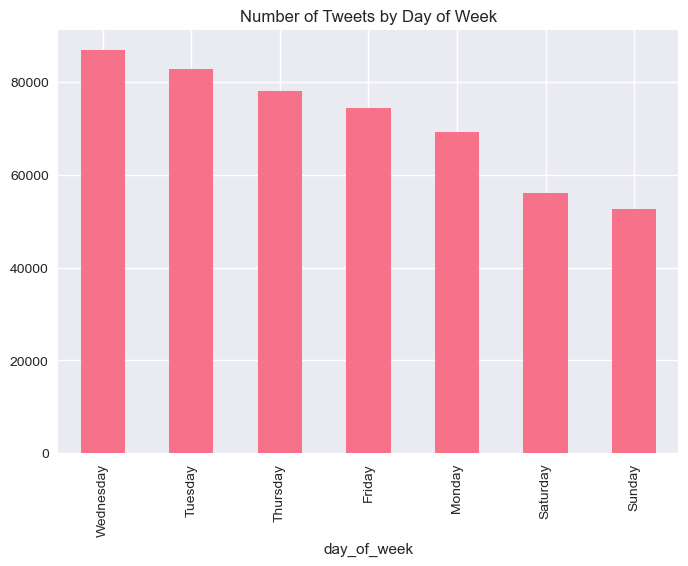

In [89]:
# Get day of week from created_at and count tweets
tweet_counts_per_day = df['created_at'].dt.day_name().value_counts()

# Plot using pandas plot()
tweet_counts.plot(kind='bar', title='Number of Tweets by Day of Week')

#### Box Plot

<Axes: >

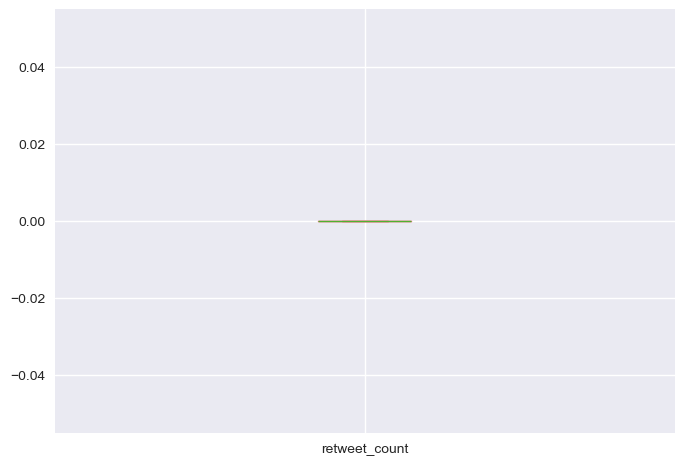

In [84]:
df['retweet_count'].apply(np.log1p).plot(kind='box', showfliers=False)


<Axes: title={'center': 'Likes vs Retweets (Log Scale)'}, xlabel='retweet_count', ylabel='like_count'>

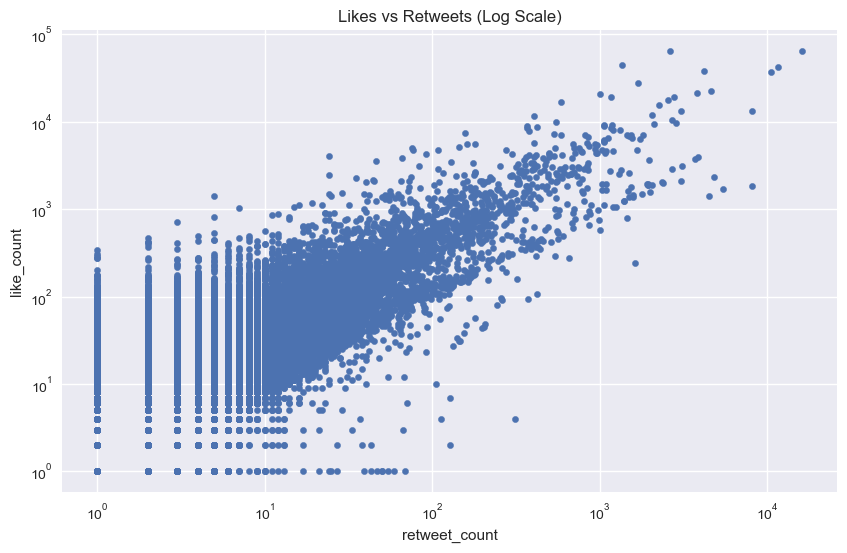

In [91]:
# Create scatter plot of likes vs retweets using pandas plot() with log scale on both axes
df.plot(kind='scatter', 
        x='retweet_count', 
        y='like_count', 
        figsize=(10, 6), 
        title='Likes vs Retweets (Log Scale)',
        logx=True,
        logy=True)



In [ ]:

# Box plot

# Scatter plot
df.plot(kind='scatter', x='retweet_count', y='reply_count', figsize=(10, 6), title='Retweets vs Replies')

# Bar plot of top 10 hashtags
df['hashtags'].explode().value_counts().head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Hashtags')


Correlation Matrix:
               retweet_count  like_count
retweet_count       1.000000    0.730383
like_count          0.730383    1.000000


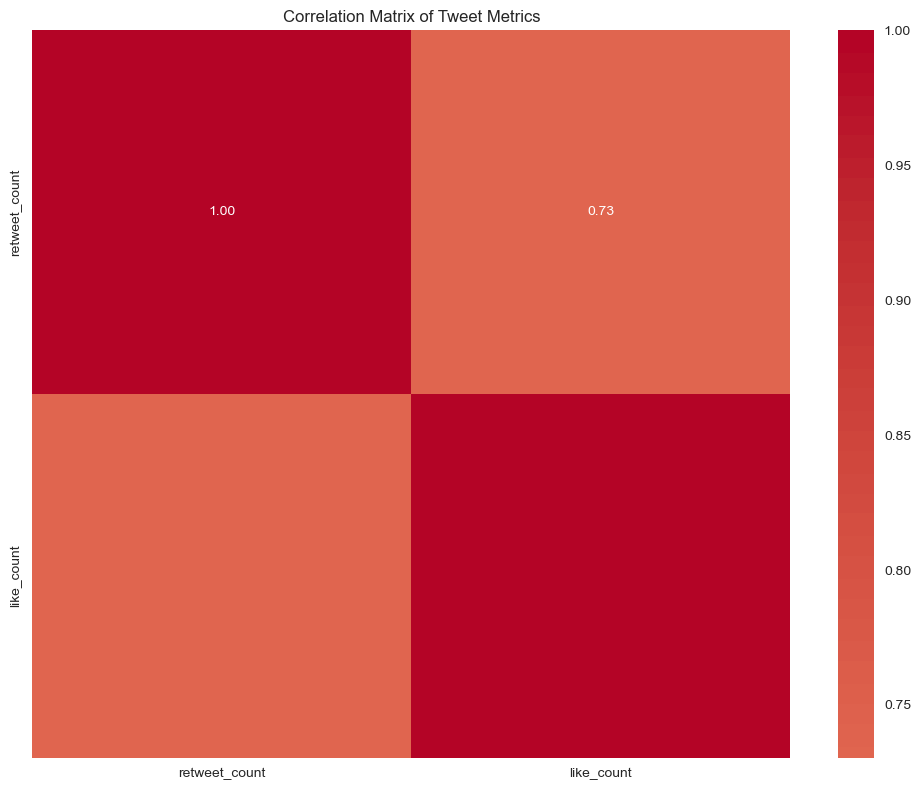


Correlation with Like Count:
like_count       1.000000
retweet_count    0.730383
Name: like_count, dtype: float64


In [94]:
# Correlation
# Calculate correlation between numeric columns
numeric_cols = ['retweet_count', 'like_count']
correlation_matrix = df[numeric_cols].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f')  # Format correlation values to 2 decimal places
plt.title('Correlation Matrix of Tweet Metrics')
plt.tight_layout()
plt.show()

# Calculate and display correlation with engagement metrics
engagement_correlations = correlation_matrix['like_count'].sort_values(ascending=False)
print("\nCorrelation with Like Count:")
print(engagement_correlations)


In [1]:
print('test')

test
